# Custom Model

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi -L
print(f'TensorFlow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
TensorFlow version: 2.3.1


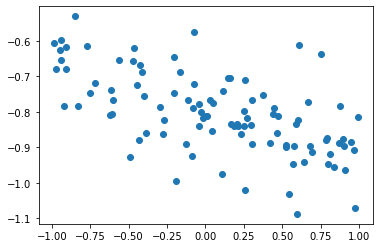

In [3]:
EPOCHS = 100
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
W = np.random.randn(D, K)
b = np.random.randn()
y = X.dot(W) + b + np.random.randn(N, K) * 0.1
X = X.astype(np.float32)
y = y.astype(np.float32)

plt.scatter(X, y)
plt.show()

100/100 [==============================] - 0s 3ms/step - loss: 0.0080


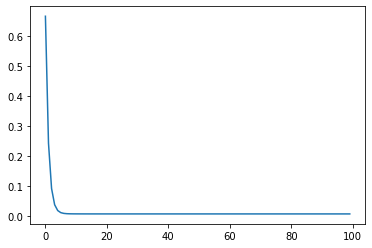

In [4]:
class LinearRegression(tf.keras.Model):

    def __init__(self, input_dim, output_dim):
        super().__init__()
        self._W = self.add_weight(
            shape=(input_dim, output_dim),
            initializer='random_normal',
            trainable=True)
        self._b = self.add_weight(
            shape=(output_dim,),
            initializer='zeros',
            trainable=True)

    def call(self, inputs):
        return tf.linalg.matmul(inputs, self._W) + self._b


model = LinearRegression(D, K)
optimizer = tf.keras.optimizers.SGD(0.2)

losses = []
progbar = tf.keras.utils.Progbar(target=EPOCHS, stateful_metrics=['loss'])
for epoch in range(EPOCHS):
    with tf.GradientTape() as tape:
        y_hat = model(X)
        error = y - y_hat
        loss = tf.math.reduce_mean(tf.math.square(error))

    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    losses.append(loss)
    progbar.add(1, values=[('loss', loss)])

plt.plot(losses)
plt.show()

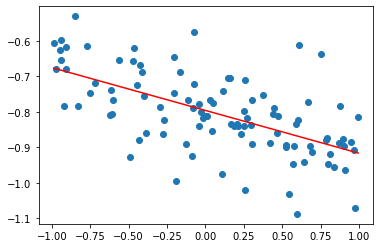

In [5]:
X_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(X_axis.reshape(-1, 1)).flatten()
plt.scatter(X, y)
plt.plot(X_axis, y_axis, color='red')
plt.show()